- Pro Gerätekategorie: 
    - Wie viel geht verloren zwischen den Stationen
    - Oder kommt noch was dazu
    - Wie geht die Bilanz auf
    - Nur für Kunststoff
    
    
 - Werte der ... durch 1000 teilen (auf tonnen umrechnen)

In [422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.sankey as sankey
import plotly.graph_objects as go

In [423]:
path1 = 'database1.csv'
path2 = 'database2.csv'
path3 = 'database3.csv'

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
# df3 = pd.read_csv(path3)

In [424]:
# To show all columns
pd.set_option('display.max_columns', None)
df1 = df1.fillna('')
df2 = df2.fillna('')

# Eine weitere Spalte erstellen (ANLAGE), die den Namen des Betriebs + dessen Ort enthält
df1["ANLAGE"]=df1["BETRIEB_NAME"] + " " + df1["BETRIEB_ORT"]
df2["ANLAGE"]=df2["BETRIEB_NAME"] + " " + df2["BETRIEB_ORT"]


# Move new Column (ANLAGE) to the start of the dataframe
df1.insert(0, 'ANLAGE', df1.pop('ANLAGE'))
df2.insert(0, 'ANLAGE', df2.pop('ANLAGE'))


# What columns are in df2 that are not in df1
columns_to_append = [col for col in df2.columns if col not in df1.columns]

# Append the selected columns from df2 to df1
df1 = pd.concat([df1, df2[columns_to_append]], axis=1)

print("DataFrame from database1.csv:\n")


DataFrame from database1.csv:



C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_19384\1243504671.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1["ANLAGE"]=df1["BETRIEB_NAME"] + " " + df1["BETRIEB_ORT"]
C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_19384\1243504671.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1.insert(0, 'ANLAGE', df1.pop('ANLAGE'))


In [425]:

def divide_by_1000(value):
    if isinstance(value, (int, float)):
        return value / 1000
    return value

df1.loc[df1['BETRIEB_NAME'] == 'Noris-Arbeit gGmbH', df1.columns != 'BETRIEB_NAME'] = df1.loc[df1['BETRIEB_NAME'] == 'Noris-Arbeit gGmbH', df1.columns != 'BETRIEB_NAME'].applymap(divide_by_1000)


In [426]:
print(df1.head(10))

                                              ANLAGE  \
0                          technocycle GmbH Bramsche   
1                Lars Walch GmbH & Co. KG Baudenbach   
2     Lars Walch GmbH & Co. GmbH & Co. KG Baudenbach   
3                Lars Walch GmbH & Co. KG Baudenbach   
4                Lars Walch GmbH & Co. KG Baudenbach   
5          FSD Lwerk Berlin Brandenburg gGmbH Berlin   
6  HKV Elektroschrott Recycling GmbH & Co. KG Mai...   
7                    Hausgeräte Lagerverkauf Dorsten   
8            BRAL Reststoff-Bearbeitungs GmbH Berlin   
9   Weinand Recyclingges. mbH & Co. KG Bad Kreuznach   

                                 BETRIEB_NAME      BETRIEB_STRASSE  \
0                            technocycle GmbH     Industriestrasse   
1                    Lars Walch GmbH & Co. KG     Raiffeisenstraße   
2         Lars Walch GmbH & Co. GmbH & Co. KG    Raiffeisenstraße    
3                    Lars Walch GmbH & Co. KG     Raiffeisenstraße   
4                    Lars Walch G

## Bilanzen für Gerätekategorie x

In [427]:
def sum_float_values(column):
    total = 0.0
    for value in column:
        if isinstance(value, (float, int)):
            total += value
    return total

In [428]:
# Funktion um zu schauen ob Totaler Eintrag oder Prozent Eintrag leer ist

def determine_missing_vals(dataframe, total_value_col, perc_value_col):

    missing_values = {"total_missing": 0, "perc_missing": 0}
    
    # Check if the specified columns exist in the DataFrame
    if total_value_col not in dataframe.columns or perc_value_col not in dataframe.columns:
        raise ValueError("One or both of the specified columns do not exist in the DataFrame.")

    # Iterate through the rows and perform the comparison
    for index, row in dataframe.iterrows():
        if row[total_value_col] == '' and row[perc_value_col] != '':
            missing_values["total_missing"] += 1
        elif row[total_value_col] != '' and row[perc_value_col] == '':
            missing_values["perc_missing"] += 1

    return missing_values

### Nach einzelnen Anlagen Filtern

In [429]:
# Nach einzelnen Anlagen (Name Betrieb + Ort des Betriebs) schauen. Falls alle Anlagen betrachtet werden sollen, das Feld leer lassen.
# Es kann auch nach Betrieben gesucht werden (dann werden alle Anlagen des Betrieb mit einbezogen)
anlage = ""

if len(anlage) != 0:
    df1 = df1[df1['ANLAGE'].str.lower().str.contains(anlage.lower())]
    
print("Anzahl der Observationen für die gegebene Anlange: ", len(df1))

Anzahl der Observationen für die gegebene Anlange:  363


### Gesamter Input für Gerätekategorie x in EBA

In [430]:
category = "KG6"
inputCategory = category + "_INPUT"
# Gesamter Input 
KG_Input_Sum = sum_float_values(df1[inputCategory])
print(KG_Input_Sum)

109832.81


### Output der EBA für Gerätekategorie x

In [431]:
column = category + "_OUT_GES_MASSE"
ges_out_eba = sum_float_values(df1[column])
# print("Gesamter Output der EBA für Kategorie", category, ": ", ges_out_eba)

column = category + "_OUT_KS_MASSE"
ks_out_eba = sum_float_values(df1[column])
print("Kunststoff Output aus der EBA für ", category, ": ", ks_out_eba)

Kunststoff Output aus der EBA für  KG6 :  8113.951999999999


## EBA die Output in Prozent aber nicht Tonnen haben

In [432]:
df_filtered = df1[df1[inputCategory] != '']

determine_missing_vals(df_filtered, "KG1_OUT_KS_MASSE", "KG1_OUT_KS_MASSE_KONTR")

{'total_missing': 0, 'perc_missing': 1}

### Input in VWA für Gerätekategorie x

In [433]:
column = category + "_TRT_GES"
ges_in_vwa = sum_float_values(df1[column])
print("Gesamter Input für VWA für Kategorie", category, ": ", ges_in_vwa)

column = category + "_TRT_KS"
ks_in_vwa = sum_float_values(df1[column])
print("Kunststoff Input für VWA für Kategorie", category, ": ", ks_in_vwa)

column = category + "_TRT_RCY"
rec_in_vwa = sum_float_values(df1[column])
print("Recycling Input in VWA für Kategorie", category, ": ", rec_in_vwa)

column = category + "_TRT_RCY_KS"
rec_ks_in_vwa = sum_float_values(df1[column])
print("Recycling Kunststoff Input in VWA für Kategorie", category, ": ", rec_ks_in_vwa)

column = category + "_TRT_RCV_OTH"
sonVW_in_vwa = sum_float_values(df1[column])
print("Sonstige Verwertung Input in VWA für Kategorie", category, ": ", sonVW_in_vwa)

column = category + "_TRT_RCV_OTH_KS"
sonVW_ks_in_vwa = sum_float_values(df1[column])
print("Sonstige Verwertung Kunststoff Input in VWA für Kategorie", category, ": ", sonVW_ks_in_vwa)



Gesamter Input für VWA für Kategorie KG6 :  86865.368
Kunststoff Input für VWA für Kategorie KG6 :  8289.952
Recycling Input in VWA für Kategorie KG6 :  69842.724
Recycling Kunststoff Input in VWA für Kategorie KG6 :  5048.0
Sonstige Verwertung Input in VWA für Kategorie KG6 :  14689.678
Sonstige Verwertung Kunststoff Input in VWA für Kategorie KG6 :  2100.952


### Anzahl an Inputwerten in VWA wo entweder Totaler Wert oder prozentualer Wert nicht angegeben ist

In [434]:
df_filtered = df1[df1[inputCategory] != '']

determine_missing_vals(df_filtered, "KG1_TRT_KS", "KG1_TRT_KONTR")

{'total_missing': 0, 'perc_missing': 0}

### Outputs der VWA für Gerätekategorie x

In [435]:
column = category + "_OUT_RCY_GES"
ges_rec_out_vwa = sum_float_values(df1[column])
print("Gesamter Recycling Output der VWA für Kategorie", category, ": ", ges_rec_out_vwa)
column = category + "_OUT_RCY_KS"
ks_rec_out_vwa = sum_float_values(df1[column])
print("Recycling Kunststoff Output der VWA für Kategorie", category, ": ", ks_rec_out_vwa)

Gesamter Recycling Output der VWA für Kategorie KG6 :  68545.724
Recycling Kunststoff Output der VWA für Kategorie KG6 :  nan


### Anzahl an Outputwerten aus VWA wo entweder Totaler Wert oder prozentualer Wert nicht angegeben ist

In [436]:
df_filtered = df1[df1[inputCategory] != '']

determine_missing_vals(df_filtered, "KG1_OUT_RCY_KS", "KG1_OUT_RCY_ANTEIL")


{'total_missing': 0, 'perc_missing': 1}

### Losses

In [437]:
# Gesamter Output der EBA die nicht in VWA eingeht
out_eba_in_vwa = ges_out_eba - ges_in_vwa
print("Output EBA der nicht in Input VWA ist: ", out_eba_in_vwa)

# Kunstoff Output der EBA die nicht in VWA eingeht
ks_out_eba_in_vwa = ks_out_eba - ks_in_vwa
print("Kunstoff output EBA der nicht in Input VWA ist: ", ks_out_eba_in_vwa)

Output EBA der nicht in Input VWA ist:  -42234.626000000004
Kunstoff output EBA der nicht in Input VWA ist:  -176.0


In [438]:
# Anteil des Recycling Input am gesamten Input in VWA

try:
    an_ges_rec_in_vwa = rec_in_vwa/ges_in_vwa
    print("Anteil des Recycling Inputs am Gesamtinput in die VWA: ", an_ges_rec_in_vwa)

    # Anteil des Recycling Inputs am gesamten Input in VWA für Kunststoffe
    an_ks_rec_in_vwa = rec_ks_in_vwa/ks_in_vwa
    print("Anteil des Recycling Inputs am Gesamtinput in die VWA für Kunststoffe: ", an_ks_rec_in_vwa)
except:
    print("noting")

Anteil des Recycling Inputs am Gesamtinput in die VWA:  0.8040341692905739
Anteil des Recycling Inputs am Gesamtinput in die VWA für Kunststoffe:  0.6089299431408047


In [439]:
# Gesamter Recycling Input in VWA vs. gesamter Recycling Output aus VWA
ges_rec_in_vwa_rec_out_vwa = rec_in_vwa - ges_rec_out_vwa
print("Recycling Input in VWA der nicht als recycelter Output auftritt: ", ges_rec_in_vwa_rec_out_vwa)

# Gesamter Recyling Input in VWA vs. gesamter Recycling Output aus VWA für Kunststoffe
ks_rec_in_vwa_rec_out_vwa = rec_ks_in_vwa - ks_rec_out_vwa
print("Recycling Input in VWA der nicht als recycelter Output auftritt für Kunststoffe: ", ks_rec_in_vwa_rec_out_vwa)

Recycling Input in VWA der nicht als recycelter Output auftritt:  1297.0
Recycling Input in VWA der nicht als recycelter Output auftritt für Kunststoffe:  nan


### Auswertung

In [440]:
print("Anzahl der relevanten Anlagen für" , category + ":", len(df1))

print("Der gesamte Input der", category, "beträgt:", KG_Input_Sum)
print("")
print("Kunststoff Output aus der EBA für", category + ":", ks_out_eba)
print("Anteil des Kunstoff Outputs der EBA am gesamten Input für die", category + ":",  round(ks_out_eba/KG_Input_Sum*100,2), "Prozent.")
print("")
print("Kunststoff Input für VWA für Kategorie", category +  ":", ks_in_vwa)
try:
    print("(Loss) Kunststoff Output der EBA die nicht in VWA eingeht:", ks_out_eba - ks_in_vwa, ". Das sind", round((ks_out_eba - ks_in_vwa)/ks_out_eba*100,2), "Prozent des Kustoff Outputvolumens der EBA.")
except:
    print("Cannot divide by zero")

try:
    print("Recycling Kunststoff Input in VWA für Kategorie", category + ":", rec_ks_in_vwa,". Das sind", round(rec_ks_in_vwa/ks_in_vwa*100, 2), "Prozent des gesamten Kunststoffinputs in die VWA.")
except:
    print("Cannot divide by zero")
    
print("")
print("Recycling Kunststoff Output der VWA für Kategorie", category + ": ", ks_rec_out_vwa)

try:
    print("(Loss) Recycling Kunstoff Input in VWA der nicht als Recycling Output auftritt:", rec_ks_in_vwa - ks_rec_out_vwa, ". Das sind", round((rec_ks_in_vwa - ks_rec_out_vwa)/rec_ks_in_vwa*100, 2), "Prozent des recycling Kunstoffinputs in die VWA.")
except: 
    print("Cannot divide by zero")

Anzahl der relevanten Anlagen für KG6: 363
Der gesamte Input der KG6 beträgt: 109832.81

Kunststoff Output aus der EBA für KG6: 8113.951999999999
Anteil des Kunstoff Outputs der EBA am gesamten Input für die KG6: 7.39 Prozent.

Kunststoff Input für VWA für Kategorie KG6: 8289.952
(Loss) Kunststoff Output der EBA die nicht in VWA eingeht: -176.0 . Das sind -2.17 Prozent des Kustoff Outputvolumens der EBA.
Recycling Kunststoff Input in VWA für Kategorie KG6: 5048.0 . Das sind 60.89 Prozent des gesamten Kunststoffinputs in die VWA.

Recycling Kunststoff Output der VWA für Kategorie KG6:  nan
(Loss) Recycling Kunstoff Input in VWA der nicht als Recycling Output auftritt: nan . Das sind nan Prozent des recycling Kunstoffinputs in die VWA.


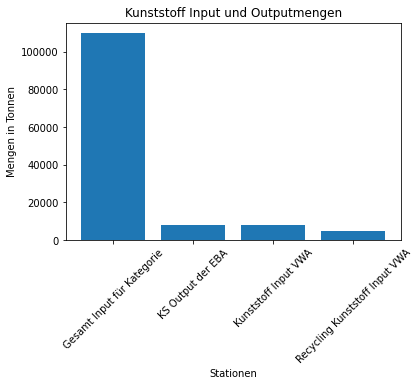

In [441]:
rest_ks_in_vwa = ks_in_vwa - rec_ks_in_vwa

variables = ['Gesamt Input für Kategorie', 'KS Output der EBA', 'Kunststoff Input VWA', 'Recycling Kunststoff Input VWA', 'KS Recycling Output der VWA']

values = [KG_Input_Sum, ks_out_eba, ks_in_vwa, rec_ks_in_vwa, ks_rec_out_vwa]

plt.bar(variables, values)

plt.xlabel('Stationen')
plt.ylabel('Mengen in Tonnen')

plt.xticks(rotation=45)

title = 'Kunststoff Input und Outputmengen für' + category
plt.title('Kunststoff Input und Outputmengen')


plt.show()

In [442]:
print(KG_Input_Sum, ges_out_eba, ks_out_eba)
print(ges_in_vwa, ks_in_vwa, rec_in_vwa, rec_ks_in_vwa, sonVW_in_vwa, sonVW_ks_in_vwa)
print(ges_rec_out_vwa, ks_rec_out_vwa)

109832.81 44630.742 8113.951999999999
86865.368 8289.952 69842.724 5048.0 14689.678 2100.952
68545.724 nan
